<a href="https://colab.research.google.com/github/Loop3D/2022_iamg_workshop/blob/main/WORKED-LoopStructural_From_model_to_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/Loop3d/LoopStructural 
!pip install lavavu-osmesa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Loop3d/LoopStructural to /tmp/pip-req-build-uua67onq
  Running command git clone -q https://github.com/Loop3d/LoopStructural /tmp/pip-req-build-uua67onq
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 57 kB 3.8 MB/s 
     |████████████████████████████████| 438 kB 17.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for LoopStructural: filename=LoopStructural-1.4.10-cp37-cp37m-linux_x86_64.whl size=1145468 sha256=fed0e2ded288c1706ec6eca06995312f01ecff4db5e55ae7e503366e736c755a
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ao3xgvq/wheels/f0/52/f7/debbf81fca78be4c814265abfa2dd29318883cf44e61eebb93
  Created wheel for scikit-fmm: filename=scikit_fmm-2022.8.15-cp37-cp37m-linux_x86_64.whl size=221598 sha256=71f

In [2]:
from LoopStructural.modelling import ProcessInputData, Map2LoopProcessor
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_geological_map_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
(
    contacts,
    stratigraphic_orientations,
    stratigraphic_thickness,
    stratigraphic_order,
    bbox,
    fault_locations,
    fault_orientations,
    fault_properties,
    fault_edges,
) = load_geological_map_data()

thicknesses = dict(
    zip(
        list(stratigraphic_thickness["name"]),
        list(stratigraphic_thickness["thickness"]),
    )
)


In [ ]:
fault_edges

In [ ]:
thicknesses

In [9]:
from LoopStructural.modelling import ProcessInputData
from LoopStructural import GeologicalModel

In [10]:
processor = ProcessInputData(contacts=contacts, 
                             contact_orientations=stratigraphic_orientations, 
                             stratigraphic_order=stratigraphic_order,
                             thicknesses=thicknesses
                             )

KeyError: ignored

In [13]:
origin = bbox.loc['origin',['X','Y','Z']]
maximum = bbox.loc['maximum',['X','Y','Z']]

In [14]:

order = [("supergroup_0", list(stratigraphic_order["unit name"]))]

##############################
# Building a stratigraphic model
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# A ProcessInputData onject can be built from these datasets using the argument names. A full list of possible arguments can be found in the documentation.


processor = ProcessInputData(
    contacts=contacts,
    contact_orientations=stratigraphic_orientations.rename(
        {"formation": "name"}, axis=1
    ),
    thicknesses=thicknesses,
    stratigraphic_order=order,
    origin=origin,
    maximum=maximum,
)

In [15]:
processor.data

,index,X,Y,Z,feature_name,val,nx,ny,nz,polarity
0,0,521588.381725,7.500714e+06,596.238979,supergroup_0,1696.0,NaN,NaN,NaN,NaN
1,1,520790.429985,7.500583e+06,592.253635,supergroup_0,1696.0,NaN,NaN,NaN,NaN
2,2,519713.530612,7.500191e+06,548.481424,supergroup_0,1696.0,NaN,NaN,NaN,NaN
3,3,527989.132168,7.501094e+06,546.005244,supergroup_0,1696.0,NaN,NaN,NaN,NaN
4,4,526591.889810,7.500682e+06,545.280019,supergroup_0,1696.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
857,201,543123.310952,7.491848e+06,603.965999,supergroup_0,NaN,0.429202,-0.142885,0.891835,1.0
858,202,544238.128958,7.492249e+06,606.486202,supergroup_0,NaN,0.228400,-0.273453,0.934375,1.0
859,203,546356.500042,7.493059e+06,584.507590,supergroup_0,NaN,-0.001725,-0.426242,0.904608,1.0
860,204,548354.744485,7.492679e+06,567.312965,supergroup_0,NaN,0.020631,-0.826087,0.563164,1.0


In [16]:
model = GeologicalModel.from_processor(processor)

In [18]:
model.update()

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
model.stratigraphic_column

In [22]:
from LoopStructural.visualisation import LavaVuModelViewer
view = LavaVuModelViewer(model)
view.add_model_surfaces(model)
view.interactive()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]


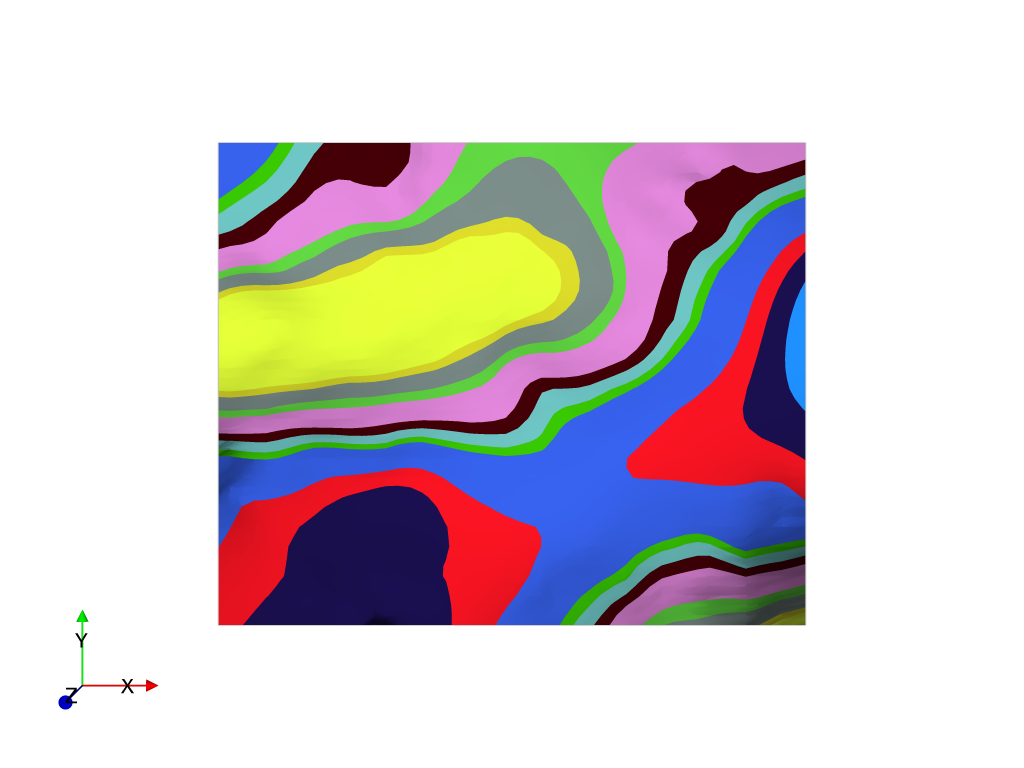

In [24]:
view.display()

In [25]:
processor = ProcessInputData(
    contacts=contacts,
    contact_orientations=stratigraphic_orientations.rename(
        {"formation": "name"}, axis=1
    ),
    thicknesses=thicknesses,
    stratigraphic_order=order,
    origin=origin,
    maximum=maximum,
    fault_edges=fault_edges,
    fault_orientations=fault_orientations,
    fault_locations=fault_locations,
    fault_properties=fault_properties,
)

In [26]:
model = GeologicalModel.from_processor(processor)


ERROR: 2022-08-29 13:33:13,933: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:13,935: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:13,947: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,031: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,033: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,038: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,105: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,107: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,112: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,195: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,197: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,203: _base_geological_feature.py:73 -- Model not set
ERROR: 2022-08-29 13:33:14,288: _base_ge

In [28]:
model.stratigraphic_column

{'supergroup_0': {'Pyradie_Formation': {'max': 236.0,
   'min': 0,
   'id': 0,
   'colour': array([0.86584543, 0.72734251, 0.9497563 ])},
  'Bunjinah_Formation': {'max': 472.0,
   'min': 236.0,
   'id': 1,
   'colour': array([0.17056391, 0.2727695 , 0.33890247])},
  'Fortescue_Group': {'max': 708.0,
   'min': 472.0,
   'id': 2,
   'colour': array([0.03367472, 0.80563734, 0.86997216])},
  'Jeerinah_Formation': {'max': 1308.0,
   'min': 708.0,
   'id': 3,
   'colour': array([0.54081552, 0.82071142, 0.97288544])},
  'Marra_Mamba_Iron_Formation': {'max': 1460.0,
   'min': 1308.0,
   'id': 4,
   'colour': array([0.56747671, 0.9786715 , 0.40136295])},
  'Wittenoom_Formation': {'max': 1696.0,
   'min': 1460.0,
   'id': 5,
   'colour': array([0.80437666, 0.69930217, 0.55679448])},
  'Mount_McRae_Shale_and_Mount_Sylvia_Formation': {'max': 1920.5,
   'min': 1696.0,
   'id': 6,
   'colour': array([0.21726364, 0.3151344 , 0.50013415])},
  'Brockman_Iron_Formation': {'max': 2477.5,
   'min': 1920.5

In [33]:
model.nsteps

(50, 50, 25)

In [34]:
view.model = model
view.clear()
view.nelements = 1e5
view.add_model_surfaces()
view.interactive()

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]


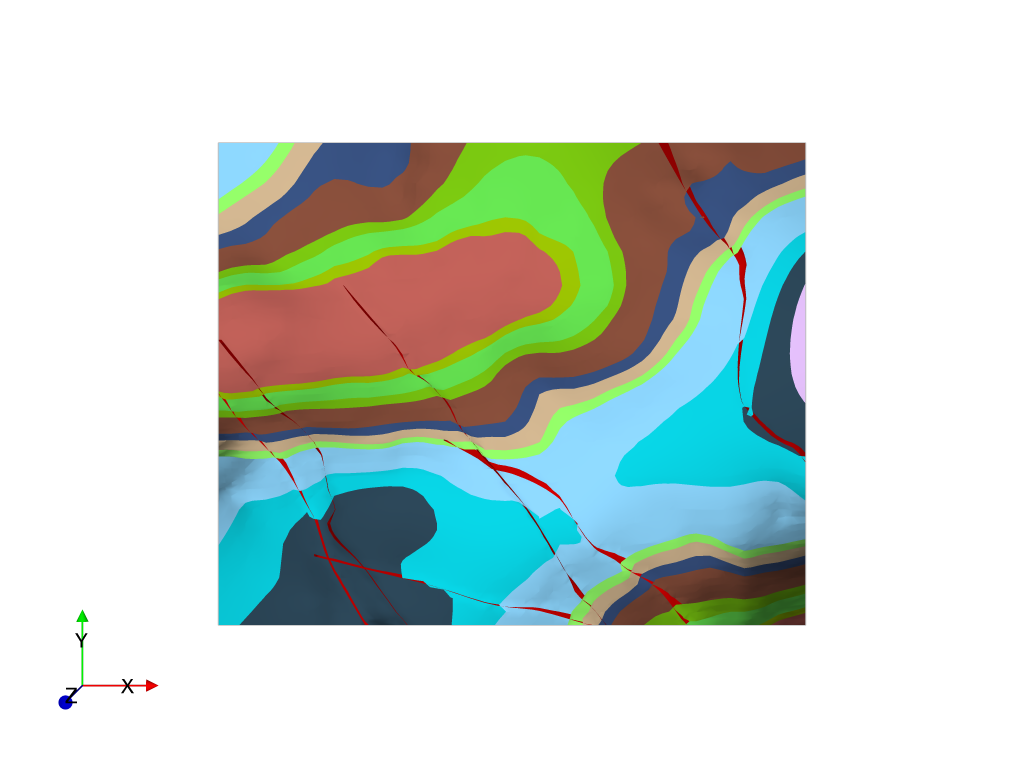

In [35]:
view.display()

In [40]:
lithology_codes = model.evaluate_model(model.regular_grid(),scale=False)